# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel
import seaborn as sns
import re

# Import Dataset

In [2]:
datasetFolderPath = r'/Users/boonsuenoh/Documents/Dev/product-recommender-system/dataset/'

In [3]:
products = pd.read_json(datasetFolderPath + 'subset_meta_Electronics.json', lines=True)

In [10]:
products.head(50)

,category,description,title,also_buy,brand,feature,also_view,main_cat,asin
0,"[Electronics, Camera &amp; Photo, Video Survei...",[The following camera brands and models have b...,Genuine Geovision 1 Channel 3rd Party NVR IP S...,[],GeoVision,"[Genuine Geovision 1 Channel NVR IP Software, ...",[],Camera & Photo,0011300000
1,"[Electronics, Camera &amp; Photo]",[This second edition of the Handbook of Astron...,"Books ""Handbook of Astronomical Image Processi...",[0999470906],33 Books Co.,[Detailed chapters cover these fundamental top...,"[0943396670, 1138055360, 0999470906]",Camera & Photo,0043396828
2,"[Electronics, eBook Readers &amp; Accessories,...",[A zesty tale. (Publishers Weekly)<br /><br />...,One Hot Summer,"[0425167798, 039914157X]",Visit Amazon's Carolina Garcia Aguilera Page,[],[],Books,0060009810
3,"[Electronics, eBook Readers & Accessories, eBo...",[],Hurray for Hattie Rabbit: Story and pictures (...,"[0060219521, 0060219580, 0060219394]",Visit Amazon's Dick Gackenbach Page,[],"[0060219521, 0060219475, 0060219394]",Books,0060219602
4,"[Electronics, eBook Readers & Accessories, eBo...",[&#8220;sex.lies.murder.fame. is brillllli&#82...,sex.lies.murder.fame.: A Novel,[],Visit Amazon's Lolita Files Page,[],[],Books,0060786817
5,"[Electronics, eBook Readers &amp; Accessories,...","[, ]",College Physics,"[0073049557, 0134454170, 1118142063, 007733968...",Visit Amazon's Alan Giambattista Page,[],"[0073512141, 0077339681, 0073049557, 007304956...",Books,0070524076
6,"[Electronics, eBook Readers & Accessories, eBo...",[GIRL WITH A ONE-TRACK MIND: CONFESSIONS OF TH...,Girl with a One-track Mind: Confessions of the...,[0330509691],ABBY LEE,[],[B0719LDQR1],Books,0091912407
7,"[Electronics, Portable Audio & Video, MP3 & MP...",[Support system: Windows XP/Vsita/7 * SNR: 85d...,abcGoodefg&reg; 4GB USB 2.0 Mp3 Music Player w...,"[B01NAJ3KQB, B00WYSPT0C, B00AF40U5G, B00OFVNM4...",Crazy Cart,[Package Content: 1 x Display MP3 Player 1 x E...,"[B01NAJ3KQB, B00OFVNM4G, B00L41WY8K, B07F34PNP...",All Electronics,0101635370
8,"[Electronics, Headphones, Earbud Headphones]","[, <b>True High Definition Sound:</b><br>With ...",Wireless Bluetooth Headphones Earbuds with Mic...,[],Enter The Arena,[Superb Sound Quality: Plays crystal clear aud...,[],Home Audio & Theater,0132492776
9,"[Electronics, Computers &amp; Accessories, Com...",[],Kelby Training DVD: Mastering Blend Modes in A...,[],Kelby Training,[],[],Computers,0132793040


In [100]:
# There are 104802 records with 19 columns
print(products.shape)

(104802, 19)


## Remove unimportant columns

In [19]:
products = products.drop(columns=['fit', 'rank', 'details', 'tech1', 'tech2', 'price', 'date', 'imageURL', 'imageURLHighRes', 'similar_item'], errors='ignore')
products.head()

,category,description,title,also_buy,brand,feature,also_view,main_cat,asin
0,"[Electronics, Camera &amp; Photo, Video Survei...",[The following camera brands and models have b...,Genuine Geovision 1 Channel 3rd Party NVR IP S...,[],GeoVision,"[Genuine Geovision 1 Channel NVR IP Software, ...",[],Camera & Photo,0011300000
1,"[Electronics, Camera &amp; Photo]",[This second edition of the Handbook of Astron...,"Books ""Handbook of Astronomical Image Processi...",[0999470906],33 Books Co.,[Detailed chapters cover these fundamental top...,"[0943396670, 1138055360, 0999470906]",Camera & Photo,0043396828
2,"[Electronics, eBook Readers &amp; Accessories,...",[A zesty tale. (Publishers Weekly)<br /><br />...,One Hot Summer,"[0425167798, 039914157X]",Visit Amazon's Carolina Garcia Aguilera Page,[],[],Books,0060009810
3,"[Electronics, eBook Readers & Accessories, eBo...",[],Hurray for Hattie Rabbit: Story and pictures (...,"[0060219521, 0060219580, 0060219394]",Visit Amazon's Dick Gackenbach Page,[],"[0060219521, 0060219475, 0060219394]",Books,0060219602
4,"[Electronics, eBook Readers & Accessories, eBo...",[&#8220;sex.lies.murder.fame. is brillllli&#82...,sex.lies.murder.fame.: A Novel,[],Visit Amazon's Lolita Files Page,[],[],Books,0060786817


### Load a into new json file

In [20]:
products.to_json(datasetFolderPath + 'subset_meta_Electronics_cleansed.json')

In [18]:
# Can Jump Start Here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel
import seaborn as sns
import re

datasetFolderPath = r'/Users/boonsuenoh/Documents/Dev/product-recommender-system/dataset/'
products = pd.read_json(datasetFolderPath + 'subset_meta_Electronics_cleansed.json')
products = products.drop(columns=['fit', 'rank', 'details', 'tech1', 'tech2', 'price', 'date', 'imageURL', 'imageURLHighRes', 'similar_item'], errors='ignore')
products = products.head(58000)

# Data Preprocessing

In [13]:
# Take a look at the data in main_cat columns
for number, letter in enumerate(list(dict.fromkeys(products['main_cat'].tolist()))):
    print(number + 1, letter)

1 Camera & Photo
2 Books
3 All Electronics
4 Home Audio & Theater
5 Computers
6 Portable Audio & Accessories
7 Cell Phones & Accessories
8 Office Products
9 Sports & Outdoors
10 GPS & Navigation
11 Toys & Games
12 Software
13 Amazon Home
14 Arts, Crafts & Sewing
15 Baby
16 Car Electronics
17 Health & Personal Care
18 Tools & Home Improvement
19 Musical Instruments
20 Pet Supplies
21 Amazon Fashion
22 Amazon Devices
23 Industrial & Scientific
24 Automotive
25 Movies & TV
26 Video Games
27 All Beauty
28 Appliances


### Observation
- Notice that there NO 21, 27, 30 and 32 are shown as image HTML tags but they are actually all the main categories which is "Amazon Fashion".
- For some main categories, the '&' character is also shown as the HTML code of "&amp;", resulting in different categories.
- Therefore, NO 21, 27, 30 and 32 will be changed to become "Amazon Fashion".
- The "&amp;" will also be replaced to "&" for main_cat and brand.

In [19]:
# Defining text cleaning function
def text_cleaning(text):
    text = re.sub(r'amp;','',text)
    text = re.sub(r'&quot;', '"', text)
    text = re.sub(r'&reg;', '®', text)
    text = re.sub(r'</span>', '', text)
    return text

products.loc[products['main_cat'].str.contains('AMAZON FASHION'), 'main_cat'] = 'Amazon Fashion'
products["category"] = products["category"].str.join(' ')

# Applying text cleaning function to each row
products['main_cat'] = products['main_cat'].apply(lambda text: text_cleaning(text))
products['brand'] = products['brand'].apply(lambda text: text_cleaning(text))
products['title'] = products['title'].apply(lambda text: text_cleaning(text))
products['category'] = products['category'].apply(lambda text: text_cleaning(text))

In [20]:
# After cleansing
for number, letter in enumerate(sorted(list(dict.fromkeys(products['category'].tolist())))):
    print(number + 1, letter)

1 Electronics Accessories & Supplies
2 Electronics Accessories & Supplies Audio & Video Accessories
3 Electronics Accessories & Supplies Audio & Video Accessories 3D Glasses
4 Electronics Accessories & Supplies Audio & Video Accessories Antennas
5 Electronics Accessories & Supplies Audio & Video Accessories Antennas Radio Antennas
6 Electronics Accessories & Supplies Audio & Video Accessories Antennas TV Antennas
7 Electronics Accessories & Supplies Audio & Video Accessories Cables & Interconnects
8 Electronics Accessories & Supplies Audio & Video Accessories Cables & Interconnects Audio Cables
9 Electronics Accessories & Supplies Audio & Video Accessories Cables & Interconnects Audio Cables Digital Coaxial Cables
10 Electronics Accessories & Supplies Audio & Video Accessories Cables & Interconnects Audio Cables Fiber Optic Cables
11 Electronics Accessories & Supplies Audio & Video Accessories Cables & Interconnects Audio Cables RCA Cables
12 Electronics Accessories & Supplies Audio & 

In [21]:
# df = products.copy()
# df["category"] = df["category"].str.join(" ")

# sorted(list(dict.fromkeys(df['category'].tolist())))

# Exploratory Data Analysis

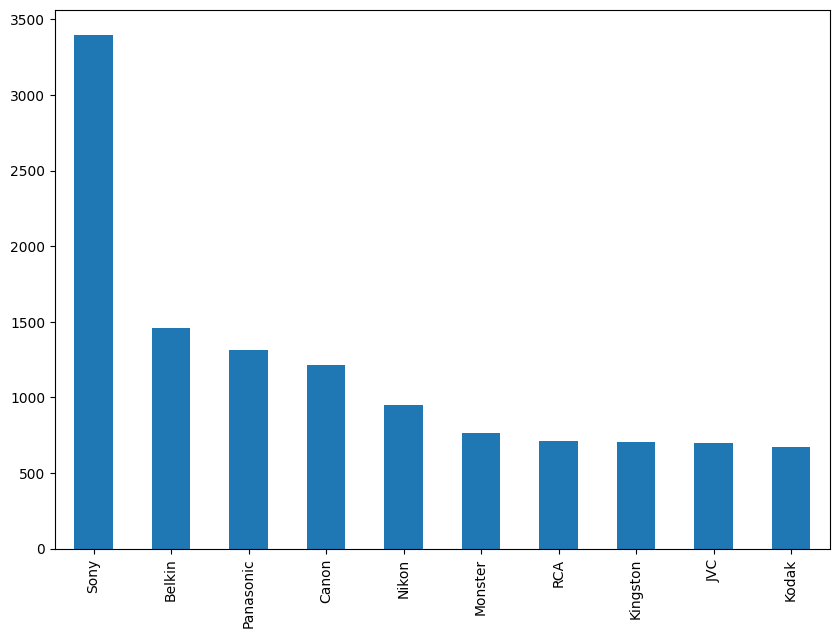

In [22]:
# Top most frequent brands
plt.subplots(figsize=(10,7))
products.brand.value_counts()[:10].plot(kind="bar")
plt.show()

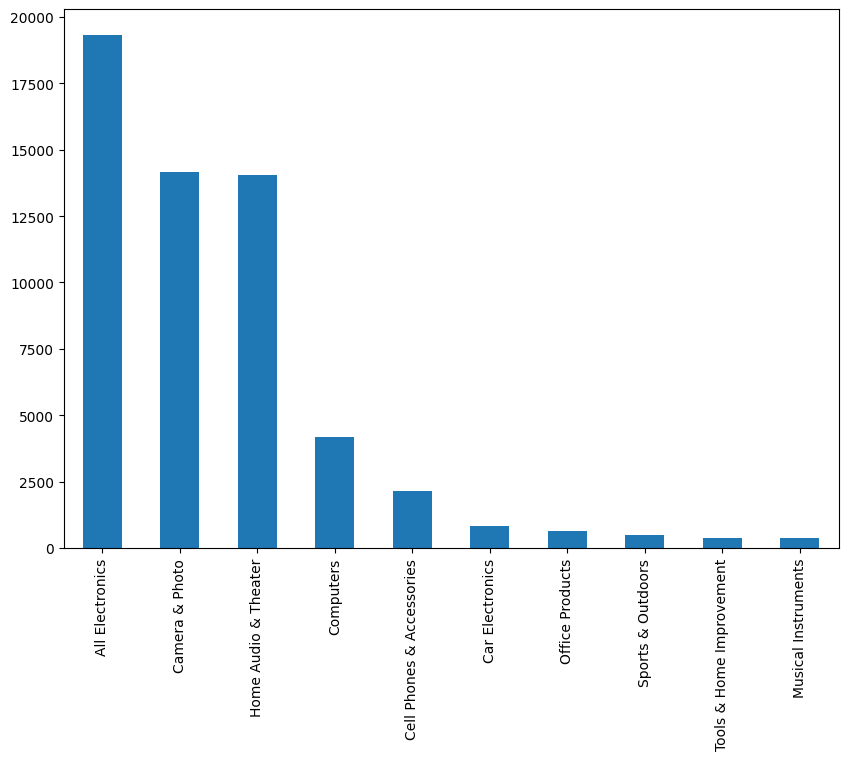

In [23]:
# Top 10 most frequent main categories
plt.subplots(figsize=(10,7))
products.main_cat.value_counts()[:10].plot(kind="bar")
plt.show()
# print(products.main_cat.value_counts()[:10])

# Content Based Filtering Recommender System

### Recommendation of products based on similar *brand* only:

In [50]:
products_brand = products[['asin', 'title', 'brand', 'category', 'main_cat']]
products_brand.head()

,asin,title,brand,category,main_cat
0,0011300000,Genuine Geovision 1 Channel 3rd Party NVR IP S...,GeoVision,Electronics Camera & Photo Video Surveillance ...,Camera & Photo
1,0043396828,"Books ""Handbook of Astronomical Image Processi...",33 Books Co.,Electronics Camera & Photo,Camera & Photo
2,0060009810,One Hot Summer,Visit Amazon's Carolina Garcia Aguilera Page,Electronics eBook Readers & Accessories eBook ...,Books
3,0060219602,Hurray for Hattie Rabbit: Story and pictures (...,Visit Amazon's Dick Gackenbach Page,Electronics eBook Readers & Accessories eBook ...,Books
4,0060786817,sex.lies.murder.fame.: A Novel,Visit Amazon's Lolita Files Page,Electronics eBook Readers & Accessories eBook ...,Books


In [25]:
# Remove stop words
tf = TfidfVectorizer(analyzer='word', stop_words='english')
# Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tf.fit_transform(products_brand['brand'])
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [26]:
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.]])

In [51]:
# Build 1-dimensional array with product titles
titles = products_brand[['title', 'brand', 'category', 'main_cat']]
indices = pd.Series(products_brand.index, index=products_brand['title'])

# print(indices["Microsoft Mouse (PS/2)"].iloc[0])
# print(list(enumerate(cosine_sim[indices["One Hot Summer"]])))

# Function that get product recommendations based on the cosine similarity score of brands
def brand_recommendations(title):
    # Get the index of the product that matches the title
    idx = indices[title]
    
    # Use the first product if there're multiple products with same title
    if (not isinstance(idx, (int, np.int64))):
        idx = indices[title].iloc[0]
    
    
    # Get the pairwsie similarity scores of all products with that product
    sim_scores = list(enumerate(cosine_sim[idx]))
    # Sort the products based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores of the 20 most similar products
    sim_scores = sim_scores[1:21]
    # Get the product indices
    product_indices = [i[0] for i in sim_scores]
    # Return the top 20 most similar products
    return titles.iloc[product_indices]

In [37]:
# Getting the product title input from user
title_input = input('Enter product title: ')

Enter product title: Sony CFD-C1000 Compact Stereo System


In [52]:
brand_recommendations(title_input)

,title,brand,category,main_cat
923,Audio Component Equalizers,Sony,Electronics Home Audio Home Theater Equalizers,Home Audio & Theater
2345,Sony MDR-NC20 Noise Canceling Headphones with ...,Sony,Electronics Headphones Over-Ear Headphones,Home Audio & Theater
2347,Sony DES51 Sport Discman Portable CD Player (Y...,Sony,Electronics Portable Audio & Video Portable CD...,Home Audio & Theater
2348,Sony ICF-S79V Weather Band Shower Radio (Disco...,Sony,Electronics Portable Audio & Video Radios Weat...,Home Audio & Theater
2596,Sony BCV615 Camcorder/Mavica Battery Charger f...,Sony,Electronics Camera & Photo Accessories Batteri...,Camera & Photo
2664,Sony 10C90HFR 90 Min HiFi 10 Pack (Discontinue...,Sony,Electronics Accessories & Supplies Blank Media,Home Audio & Theater
2668,Sony 60 Minute DVC Premium Chipless (Single),Sony,Electronics Camera & Photo Accessories Blank V...,Camera & Photo
2705,Sony T-160 VHS Video Cassette (Single),Sony,Electronics Camera & Photo Accessories Blank V...,Home Audio & Theater
2710,SONY HIGH GRADE 120 MIN VIDEO CASSETTE,Sony,Electronics Camera & Photo Accessories Blank V...,Home Audio & Theater
2769,Sony C60HFR Single 60-minute Type 1 Audio Cass...,Sony,Electronics Accessories & Supplies Blank Media,Home Audio & Theater


In [47]:
# print(list(dict.fromkeys(products['title'].tolist())))
print(sorted(list(dict.fromkeys(products['brand'].tolist()))))

['', '.', '0mni Mount Systems', '100% New Brand', '1st Choice', '2Wire', '33 Books Co.', '360Smartdeal', '3Com', '3D', '3DCONNEX', '3DLabs', '3M', '3dfx', '3ware', '5661', '??????', 'A Days Tech', 'A&L Distributing Co.', 'ABBY LEE', 'ABIT', 'ABIT Computer', 'ABL', 'ACCO Brands', 'ACP', 'ACP - MEMORY UPGRADES', 'ADS Tech', 'ADS Technologies', 'ADT', 'ADTRAN', 'AG Neovo', 'AI', 'AIM Electronics', 'AIMECOR', 'AITECH', 'AIWA', 'AKG', 'ALBERTO SPITALE', 'ALC Alert', 'ALOOK', 'ALPHA BEATS', 'AMBI', 'AMC', 'AMD', 'AMERICA ACTION', 'AMW', 'ANTOP', 'AOC', 'AODINI', 'AOSHR', 'AOpen', 'AP Audio', 'APC', 'APCC', 'APEX', 'AQUALATION', 'ARCHITECH', 'ARCHITECH PRESTIGE', 'ARKON', 'ART', 'ASA', 'ASA Staff', 'ASA Test Prep Board', 'ASINNO', 'ASPIRE DIGITAL', 'AT&T', 'AT&T Lucent', 'ATEN', 'ATI', 'ATI Technologies', 'ATN', 'ATP', 'ATTO Technology', 'ATool', 'AV', 'AVBcable.com', 'AVERMEDIA', 'AVer Information Inc.', 'AVerMedia', 'AWESAFE', 'AXIS', 'AXIS COMMUNICATION  INC.', 'Aaron Rayburn', 'Aastra', '

In [19]:
print(products.iloc[8]['title'])

Wireless Bluetooth Headphones Earbuds with Microphone in Ear Headphones Noise Cancelling Earbuds with Mic Sweatproof Bluetooth Earphones Stereo Headset for Running Workout Gym Sports Secure Fit Case


### Recommendation of products based on similar *main category* only:

In [53]:
products_main_cat = products[['asin', 'title', 'main_cat', 'category', 'brand']]
products_main_cat.head()

,asin,title,main_cat,category,brand
0,0011300000,Genuine Geovision 1 Channel 3rd Party NVR IP S...,Camera & Photo,Electronics Camera & Photo Video Surveillance ...,GeoVision
1,0043396828,"Books ""Handbook of Astronomical Image Processi...",Camera & Photo,Electronics Camera & Photo,33 Books Co.
2,0060009810,One Hot Summer,Books,Electronics eBook Readers & Accessories eBook ...,Visit Amazon's Carolina Garcia Aguilera Page
3,0060219602,Hurray for Hattie Rabbit: Story and pictures (...,Books,Electronics eBook Readers & Accessories eBook ...,Visit Amazon's Dick Gackenbach Page
4,0060786817,sex.lies.murder.fame.: A Novel,Books,Electronics eBook Readers & Accessories eBook ...,Visit Amazon's Lolita Files Page


In [54]:
# Remove stop words
tf_1 = TfidfVectorizer(analyzer='word', stop_words='english')
# Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix_1 = tf_1.fit_transform(products_main_cat['main_cat'])
# Compute the cosine similarity matrix
cosine_sim_1 = linear_kernel(tfidf_matrix_1, tfidf_matrix_1)

In [55]:
cosine_sim_1

array([[1., 1., 0., ..., 0., 1., 0.],
       [1., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [1., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.]])

In [56]:
# Build 1-dimensional array with product titles
titles_1 = products_main_cat[['title', 'main_cat', 'category', 'brand']]
indices_1 = pd.Series(products_main_cat.index, index=products_main_cat['title'])

# Function that get product recommendations based on the cosine similarity score of main_cat
def main_cat_recommendations(title):
    # Get the index of the product that matches the title
    idx = indices_1[title]
    
    # Use the first product if there're multiple products with same title
    if (not isinstance(idx, (int, np.int64))):
        idx = indices_1[title].iloc[0]
    
    # Get the pairwsie similarity scores of all products with that product
    sim_scores = list(enumerate(cosine_sim_1[idx]))
    # Sort the products based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores of the 20 most similar products
    sim_scores = sim_scores[0:21]
    # Get the product indices
    product_indices = [i[0] for i in sim_scores]
    # Return the top 20 most similar products
    return titles_1.iloc[product_indices]

In [57]:
# Getting the product title input from user
title_input = input('Enter product title: ')

Enter product title: Sony CFD-C1000 Compact Stereo System


In [58]:
main_cat_recommendations(title_input)

,title,main_cat,category,brand
8,Wireless Bluetooth Headphones Earbuds with Mic...,Home Audio & Theater,Electronics Headphones Earbud Headphones,Enter The Arena
15,TDK Hi8 MP120 Premium Performance Camcorder Vi...,Home Audio & Theater,Electronics Camera & Photo Accessories Blank V...,TDK Electronics Corp
16,The Lord of the Rings: Return of the King - Ex...,Home Audio & Theater,Electronics Accessories & Supplies,WB
43,I Survived 10 Book Library,Home Audio & Theater,Electronics Accessories & Supplies,
70,Official Nook Audio Ie250 Earphones,Home Audio & Theater,Electronics Headphones Earbud Headphones,Nook
84,Barnes & Noble HDTV Adapter Kit for NOOK HD an...,Home Audio & Theater,Electronics Computers & Accessories Tablet Acc...,Barnes & Noble
92,"Barnes & Noble Nook Oliver Cover, Black",Home Audio & Theater,Electronics eBook Readers & Accessories Covers,Barnes and Noble
100,"Barnes & Noble FITS 6"" TABLET / E-READER NOOK ...",Home Audio & Theater,Electronics eBook Readers & Accessories,Barnes & Noble
113,NOOK Simple Touch Industriell Stripe Stand Cov...,Home Audio & Theater,Electronics eBook Readers & Accessories Covers,Barnes & Noble
130,"The Mutineer: Rants, Ravings, and Missives fro...",Home Audio & Theater,Electronics Headphones Earbud Headphones,Enter The Arena


In [49]:
# list(dict.fromkeys(products.iloc[200:300]['title'].tolist()))

products[products['brand'].str.contains("Microsoft", case=False)]

,category,description,title,also_buy,brand,feature,also_view,main_cat,asin
42,Electronics Computers & Accessories Computer A...,[Microsoft MultiMedia Keyboard 1.0A KB-0168],Microsoft MultiMedia Keyboard 1.0A KB-0168,[],Microsoft,[Microsoft MultiMedia Keyboard 1.0A KB-0168],[],Computers,0545205719
2816,Electronics Computers & Accessories Computer A...,[Super Clean - Durable Ergonomic 2-Button 9 Pi...,Microsoft Mouse (PS/2),[],Microsoft,"[Precise control of the cursor, The more you u...","[B000HGMMH6, B008859096, B077JMJ7KL, B01N5MYE7...",All Electronics,B00000JDE5
2823,Electronics Computers & Accessories Computer A...,[Basic Microsoft mouse. Works great with class...,Microsoft Basic Mouse V1.0 Series and PS/2 Win...,[B00HGI5JPA],Microsoft,"[Easy set-up with no software to install, Work...","[B00004XPMQ, B00JELJFCU]",All Electronics,B00000JDDL
2828,Electronics Computers & Accessories Computer A...,"[Natural Keyboard Elite features a split, gent...",Microsoft Natural Keyboard Elite,"[B004SUIM4E, B0000642RX]",Microsoft,"[Split, gently sloped shape, Additional keys p...","[B004SUIM4E, B0000642RX, B000A6PPOK, B075H1D95...",All Electronics,B00000JDFD
2832,Electronics Computers & Accessories Computer A...,[The IntelliMouse makes scrolling simple by ro...,Microsoft 673-00089 IntelliMouse,[],Microsoft,"[Work hands free with AutoScroll, Zoom efficie...",[B076C75X1T],All Electronics,B00000JDFO
...,...,...,...,...,...,...,...,...,...
56160,Electronics Computers & Accessories Computer A...,[A wireless optical desktop with advanced feat...,Microsoft Wireless Optical Desktop - PC/Mac,[],Microsoft,"[Left or Right-Handed, Customizable Buttons, E...",[],All Electronics,B0001MBLNC
56382,Electronics Computers & Accessories Computer A...,[],Microsoft Wireless Wheel Mouse (R06-00003),[],Microsoft,"[Microsoft WIRELESS WHEEL MOUSE, Wireless Free...",[],Computers,B0001P4M0I
57337,Electronics Computers & Accessories Computer A...,[Microsoft Wireless Intellimouse Explorer w/Ti...,Microsoft Wireless Intellimouse Explorer for W...,[],Microsoft,[Microsoft M03-00072 Wireless Intellimouse Exp...,[],All Electronics,B00022PTQQ
57346,Electronics Computers & Accessories Computer A...,[Work in comfort at home and on the go with th...,Microsoft Notebook Optical Mouse (Black ),[],Microsoft,[Microsoft M20-00013 Notebook Optical Mouse (B...,[B00006IJX7],All Electronics,B00022PTUC


### Recommendation of products based on similar *categories* tag only:

In [59]:
products_category = products[['asin', 'title', 'category', 'brand', 'main_cat']]
products_category.head()

,asin,title,category,brand,main_cat
0,0011300000,Genuine Geovision 1 Channel 3rd Party NVR IP S...,Electronics Camera & Photo Video Surveillance ...,GeoVision,Camera & Photo
1,0043396828,"Books ""Handbook of Astronomical Image Processi...",Electronics Camera & Photo,33 Books Co.,Camera & Photo
2,0060009810,One Hot Summer,Electronics eBook Readers & Accessories eBook ...,Visit Amazon's Carolina Garcia Aguilera Page,Books
3,0060219602,Hurray for Hattie Rabbit: Story and pictures (...,Electronics eBook Readers & Accessories eBook ...,Visit Amazon's Dick Gackenbach Page,Books
4,0060786817,sex.lies.murder.fame.: A Novel,Electronics eBook Readers & Accessories eBook ...,Visit Amazon's Lolita Files Page,Books


In [ ]:
### Recommendation of products based on similar *categories* tag only:

In [ ]:
# Creating datasoup made of selected columns
products_category['ensemble'] = df['title'] + ' ' + df['categories'].astype(str) + ' ' + df['brand']

#Printing record at index 0
df['ensemble'].iloc[0]

output: 
"Barnes &amp; Noble NOOK Power Kit in Carbon BNADPN31 
[['Electronics', 'eBook Readers & Accessories', 'Power Adapters']] 
Barnes &amp; Noble"

products_category.head()